In [1]:
## Importing all the necessary libraries
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
## Mounting drive inorder to read data
from google.colab import drive
drive.mount('/content/gdrive')

train_path = '/content/drive/My Drive/training'
test_path = '/content/drive/My Drive/testing'

Mounted at /content/gdrive


In [3]:
## Fetching the train images and label information
trainimages = []  
trainlabels =[]     
i = 0
for folder in os.listdir('gdrive/My Drive/training'):
  train_path = 'gdrive/My Drive/training/'+folder
  for filename in os.listdir(train_path):
        
        image_path = train_path+"/"+filename

        img = cv2.imread(image_path)
        
        img = cv2.resize(img,(32,32))

        trainlabels.append(i)
        
        trainimages.append(img)
  i=i+1

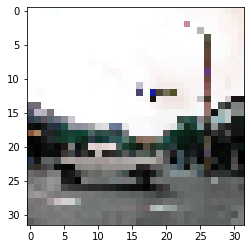

In [4]:
plt.imshow(trainimages[2122])

In [5]:
## Fetching the test images and label information
testimages = []  
testlabels =[]     
j = 0
for folder in os.listdir('gdrive/My Drive/testing'):
  test_path = 'gdrive/My Drive/testing/'+folder
  for filename in os.listdir(test_path):
        
        image_path = test_path+"/"+filename

        img = cv2.imread(image_path)
        
        img = cv2.resize(img,(32,32))

        testlabels.append(j)
        
        testimages.append(img)
  j=j+1


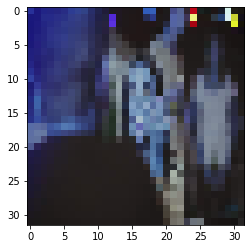

In [6]:
plt.imshow(testimages[540])
plt.show()

In [7]:
## Converting into array and normalize
trainimages = np.array(trainimages)
trainimages = trainimages/255.0
trainlabels=np.array(trainlabels)
testimages = np.array(testimages)
testimages = testimages/255.0
testlabels=np.array(testlabels)

In [8]:
testlabels=[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
             3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,
11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,
12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,
15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,
10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,
17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,
13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,
14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,
]

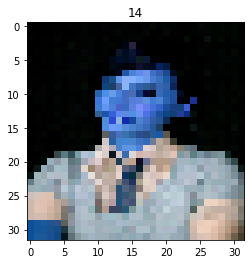

In [9]:
plt.imshow(testimages[542])
plt.title(testlabels[542])
plt.show()

In [10]:
## Spliting Train and Validation data
trainimages, valimages, trainlabels, vallabels = train_test_split(trainimages, trainlabels, test_size=0.2, shuffle=True)

In [ ]:
## Pulling VGG16 weights
vgg = VGG16(input_shape=(32,32,3), weights='imagenet', include_top=False)
## Making all the above layers intrainable
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
pred = Dense(19, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=pred)
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
# fit the model
history = model.fit(trainimages,trainlabels,validation_data=(valimages, vallabels),epochs=10,batch_size=32)

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

Epoch 1/10
56/56 [==============================] - 4s 41ms/step - loss: 2.8328 - accuracy: 0.1265 - val_loss: 2.6701 - val_accuracy: 0.1820
Epoch 2/10
56/56 [==============================] - 1s 24ms/step - loss: 2.4683 - accuracy: 0.2677 - val_loss: 2.4530 - val_accuracy: 0.2562
Epoch 3/10
56/56 [==============================] - 1s 24ms/step - loss: 2.2662 - accuracy: 0.3341 - val_loss: 2.3433 - val_accuracy: 0.2607
Epoch 4/10
56/56 [==============================] - 1s 24ms/step - loss: 2.1344 - accuracy: 0.3701 - val_loss: 2.2607 - val_accuracy: 0.2876
Epoch 5/10
56/56 [==============================] - 1s 24ms/step - loss: 2.0343 - accuracy: 0.3909 - val_loss: 2.2063 - val_accuracy: 0.2876
Epoch 6/10
56/56 [==============================] - 1s 24ms/step - loss: 1.9604 - accuracy: 0.4179 - val_loss: 2.1709 - val_accuracy: 0.3079
Epoch 7/10
56/56 [==============================] - 1s 24ms/step - loss: 1.8987 - accuracy: 0.4258 - val_loss: 2.1314 - val_accuracy: 0.3236
Epoch 8/10
56

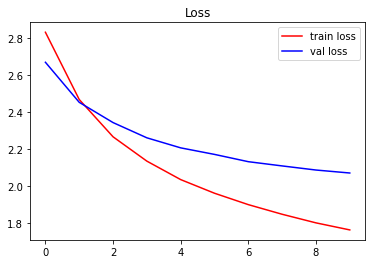

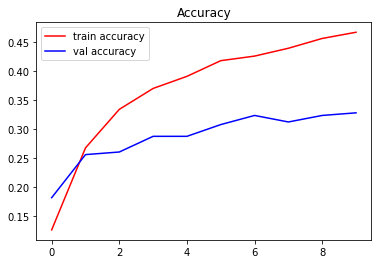

[[19  1  1  0  2  1  0  1  0  1  1  0  0  0  1  1  1  0  0]
 [ 4 13  0  0  0  1  0  0  1  0  0  3  2  0  4  1  1  0  0]
 [ 1  1 12  1  2  0  1  0  3  2  0  0  3  1  1  2  0  0  0]
 [ 3  1  3  6  1  1  1  1  0  1  0  0  2  0  0  7  0  3  0]
 [ 0  0  3  0 18  2  0  2  2  1  0  1  1  0  0  0  0  0  0]
 [ 4  1  1  0  3  3  0  3  2  1  0  0  7  0  1  0  3  0  1]
 [ 0  1  0  0  0  0 22  1  0  0  0  0  0  3  0  3  0  0  0]
 [ 2  2  3  0  3  0  0 11  0  1  1  1  1  1  2  1  0  1  0]
 [ 1  1  1  7  0  1  0  2 15  0  1  1  0  0  0  0  0  0  0]
 [ 0  3  3  1  3  1  2  2  5  7  0  0  0  2  0  0  0  1  0]
 [ 1  4  1  1  0  0  2  1  0  0  7  0  5  6  0  1  1  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  6  3  0 13  4  1  0  2]
 [ 1  1  0  0  1  1  0  0  0  0  1  2 15  0  5  1  1  0  1]
 [ 0  0  0  0  1  1 10  1  0  0  5  0  0 12  0  0  0  0  0]
 [ 3  1  0  0  2  0  0  2  1  0  1  3  2  1 10  1  3  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  1  3  0  2 18  1  0  3]
 [ 4  3  3  1  3  3  0  1  1  0  2  0  5

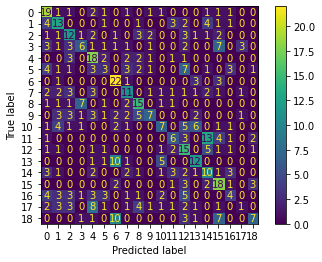

In [ ]:
## Plotting graphs of Training loss Vs Validation loss
plt.plot(history.history['loss'], color='r',label='train loss')
plt.plot(history.history['val_loss'], color='b', label ='val loss')
plt.title("Loss")
plt.legend()
plt.show()
## Plotting graphs of Training Accuracy Vs Validation Accuracy
plt.plot(history.history['accuracy'], color='r', label="train accuracy")
plt.plot(history.history['val_accuracy'], color='b', label="val accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()
y_pred = model.predict(testimages)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(testlabels, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(accuracy_score(testlabels, y_pred))
